# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Farhan Ramadhan
- **Email:** macfarhan04@gmail.com
- **ID Dicoding:** muhamad_farhan_ml_59

## Menentukan Pertanyaan Bisnis

- Berdasarkan jam dalam 1 hari, kapan waktu penyewaan sepeda paling tinggi dan paling rendah?
- Apakah ada peningkatan atau penurunan yang konsisten dalam jumlah penyewaan sepeda setiap bulan?
- Apakah pola musiman (musim panas, musim dingin, dll.) berpengaruh terhadap frekuensi peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, zipfile

## Data Wrangling

### Gathering Data

In [45]:
local_zip = '/content/Bike-sharing-dataset.zip'

# Membuka dan mengekstrak file ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/bike-sharing-dataset')

In [46]:
# Tabel Day
day = pd.read_csv("bike-sharing-dataset/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
# Tabel Hour
hour = pd.read_csv("bike-sharing-dataset/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
#Menggabungkan data harian dan data per jam
combined_data = pd.merge(
    left=day,
    right=hour,
    on='dteday',
    how='inner',
    suffixes=('_daily', '_hourly')
)

print(f"Dataset gabungan memiliki {combined_data.shape[0]} baris dan {combined_data.shape[1]} kolom.\n")
display(combined_data.head(5))

Dataset gabungan memiliki 17379 baris dan 32 kolom.



,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [49]:
# Memeriksa tipe data dari tiap kolom
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [51]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [52]:
# mendeteksi missing value di dataset hour
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [53]:
# mendeteksi missing value di dataset day
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdeteksi missing value pada dataset 'day' dan 'hour'

In [54]:
# Mengecek duplikasidi kedua dataset
combined_data.duplicated().sum()

0

Tidak terdeteksi duplikasi pada kedua dataset

In [55]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [57]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Kolom seperti 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit' akan dikonversi dari tipe data integer ke tipe data kategori (category).
- Kolom dteday, yang sebelumnya bertipe object, akan diubah menjadi tipe datetime agar lebih mudah dikelola



In [58]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day[column] =  day[column].astype("category")
    hour[column] =  hour[column].astype("category")

In [59]:
# Mengubah tipe data dteday menjadi 'datetime'
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])
combined_data['dteday'] = pd.to_datetime(combined_data['dteday'])

In [60]:
# Mengubah nama kolom agar lebih deskriptif
day = day.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'cnt': 'total_count',
    'hum': 'humidity'
})

hour = hour.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'cnt': 'total_count',
    'hum': 'humidity'
})

combined_data = combined_data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_condition',
    'windspeed': 'wind_speed',
    'cnt': 'total_count',
    'hum': 'humidity'
})

In [61]:
# Mengubah nilai dalam kolom menjadi lebih informatif
# Mengonversi season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season'] = day['season'].map(season_mapping)
hour['season'] = hour['season'].map(season_mapping)
combined_data['season_hourly'] = combined_data['season_hourly'].map(season_mapping)
combined_data['season_daily'] = combined_data['season_daily'].map(season_mapping)

# Mengonversi month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day['month'] = day['month'].map(month_mapping)
hour['month'] = hour['month'].map(month_mapping)

# Mengonversi weather_condition
weather_mapping = {
    1: 'Clear', 2: 'Misty', 3: 'Light_Rain_Snow', 4: 'Heavy_Rain_Snow'
}
day['weather_condition'] = day['weather_condition'].map(weather_mapping)
hour['weather_condition'] = hour['weather_condition'].map(weather_mapping)

# Mengonversi day_of_week
day_of_week_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day['day_of_week'] = day['day_of_week'].map(day_of_week_mapping)
hour['day_of_week'] = hour['day_of_week'].map(day_of_week_mapping)

# Mengonversi year
year_mapping = {0: '2011', 1: '2012'}
day['year'] = day['year'].map(year_mapping)
hour['year'] = hour['year'].map(year_mapping)



In [62]:
# Mengubah nilai humidity ke dalam persentase
day['humidity'] = day['humidity'] * 100
hour['humidity'] = hour['humidity'] * 100

# Menambahkan kolom baru untuk kategori hari (weekend/weekday)
def determine_day_category(day):
    return 'weekend' if day in ['Saturday', 'Sunday'] else 'weekday'

day['day_category'] = day['day_of_week'].apply(determine_day_category)
hour['day_category'] = hour['day_of_week'].apply(determine_day_category)

# Menambahkan kolom baru untuk kategori kelembapan
def classify_humidity_level(humidity):
    if humidity < 45:
        return 'Too Dry'
    elif 45 <= humidity < 65:
        return 'Ideal'
    else:
        return 'Too Humid'

day['humidity_category'] = day['humidity'].apply(classify_humidity_level)
hour['humidity_category'] = hour['humidity'].apply(classify_humidity_level)


# Exploratory Data Analysis (EDA)

##Eksplorasi Data hour_df

In [63]:
hour.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,wind_speed,casual,registered,total_count,day_category,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,Too Humid
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Dataset ini terdiri dari 17.379 baris data yang mencakup berbagai informasi terkait kondisi cuaca, waktu, dan jumlah pengguna. Dari data yang tersedia, rata-rata jumlah pengguna yang terdaftar adalah 153.79, sementara rata-rata jumlah pengguna tidak terdaftar adalah 35.68. Dari segi waktu, dataset mencakup data dari berbagai jam dalam sehari, dengan distribusi yang merata dari pukul 00:00 hingga 23:00. Sebagian besar aktivitas penyewaan juga terjadi pada hari kerja (68.27%) dibandingkan dengan hari libur.

In [64]:
hourly_demographics = hour.groupby('hour').agg(
    total_rentals=('total_count', 'sum'),
    average_rentals=('total_count', 'mean'),
    rental_std_dev=('total_count', 'std')
)

hourly_demographics

,total_rentals,average_rentals,rental_std_dev
hour,,,
0,39130,53.898072,42.307910
1,24164,33.375691,33.538727
2,16352,22.869930,26.578642
3,8174,11.727403,13.239190
4,4428,6.352941,4.143818
5,14261,19.889819,13.200765
6,55132,76.044138,55.084348
7,154171,212.064649,161.441936
8,261001,359.011004,235.189285


Berdasarkan data penyewaan sepeda dalam 1 hari, waktu dengan frekuensi penyewaan tertinggi adalah pukul 17:00 dengan total penyewaan sebanyak 336.860. Sebaliknya, waktu dengan jumlah penyewaan terendah adalah pukul 04:00 dengan total penyewaan sebanyak 4.428. Hal ini menunjukkan bahwa puncak aktivitas penyewaan terjadi pada sore hari, sementara aktivitas penyewaan paling sedikit terjadi pada dini hari.

##Eksplorasi Data day_df

In [65]:
day.describe(include="all")

,instant,dteday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,wind_speed,casual,registered,total_count,day_category,humidity_category
count,731.000000,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,Ideal
freq,NaN,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik diatas, dapat diperoleh informasi dataset secara keseluruhan mencakup 731 hari data penyewaan sepeda. Jumlah penyewaan sepeda harian (total_count) berkisar antara 22 hingga 8714 sepeda, dengan rata-rata 4504.35 sepeda per hari dan standar deviasi sebesar 1931.21 sepeda.

In [66]:
# Memperbarui groupby untuk menyertakan parameter observed=False
season_summary = day.groupby('season', observed=False).agg(
    total_rentals=('total_count', 'sum'),
    average_temp=('temp', 'mean')
).sort_values(by='total_rentals', ascending=False).reset_index()

# Menampilkan hasil ringkasan tanpa peringatan
season_summary

,season,total_rentals,average_temp
0,Fall,1061129,0.706309
1,Summer,918589,0.544405
2,Winter,841613,0.422906
3,Spring,471348,0.297748


Musim dengan jumlah penyewaan terbanyak adalah Fall (1061129), diikuti dengan Summer (918589), Winter (841613), dan terakhir Spring (471348).
Hal tersebut menunjukkan bahwa musim Fall dan musim Summer menjadi musim dengan aktivitas penyewaan sepeda yang paling tinggi. Rata-rata suhu tertinggi terjadi di musim semi (0.706309) dan musim panas (0.544405). Dari data tersebut, penyewaan tertinggi di musim Fall dan Summer kemungkinan dipengaruhi oleh faktor cuaca dan suhu. Musim dengan suhu yang nyaman dan cuaca stabil, seperti musim gugur dan musim panas, cenderung meningkatkan frekuensi peminjaman sepeda. Sementara itu, musim dingin dan musim semi menunjukkan penurunan frekuensi karena faktor cuaca yang kurang mendukung aktivitas luar ruangan seperti bersepeda.

In [43]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
day['month_numeric'] = day['month'].map(month_mapping)


def determine_season(month):
    if month in [12, 1, 2]:  # Desember - Februari
        return 'Winter'
    elif month in [3, 4, 5]:  # Maret - Mei
        return 'Spring'
    elif month in [6, 7, 8]:  # Juni - Agustus
        return 'Summer'
    elif month in [9, 10, 11]:  # September - November
        return 'Fall'

day['season'] = day['month_numeric'].apply(determine_season)

monthly_trend = day.groupby(['month_numeric'], observed=False).agg(
    total_rentals=('total_count', 'sum')
).reset_index()


monthly_trend['season'] = monthly_trend['month_numeric'].apply(determine_season)


month_name_mapping = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
monthly_trend['month_name'] = monthly_trend['month_numeric'].map(month_name_mapping)


final_table = monthly_trend[['month_name', 'season', 'total_rentals']]


from tabulate import tabulate
print(tabulate(final_table, headers='keys', tablefmt='grid', showindex=False))


+--------------+----------+-----------------+
| month_name   | season   |   total_rentals |
+==============+==========+=================+
| Januari      | Winter   |          134933 |
+--------------+----------+-----------------+
| Februari     | Winter   |          151352 |
+--------------+----------+-----------------+
| Maret        | Spring   |          228920 |
+--------------+----------+-----------------+
| April        | Spring   |          269094 |
+--------------+----------+-----------------+
| Mei          | Spring   |          331686 |
+--------------+----------+-----------------+
| Juni         | Summer   |          346342 |
+--------------+----------+-----------------+
| Juli         | Summer   |          344948 |
+--------------+----------+-----------------+
| Agustus      | Summer   |          351194 |
+--------------+----------+-----------------+
| September    | Fall     |          345991 |
+--------------+----------+-----------------+
| Oktober      | Fall     |       

Awal Tahun (Januari) memiliki jumlah penyewaan terendah (134,933), dan terdapat peningkatan konsisten hingga Maret (228,920). Dari April (269,094) hingga Agustus (351,194), terdapat tren peningkatan yang signifikan dengan puncaknya pada bulan Agustus. Setelah mencapai puncak di Agustus, jumlah penyewaan mulai menurun perlahan dari September (345,991) hingga November (254,831).Pada Desember (211,036), jumlah penyewaan menunjukkan penurunan tajam dibandingkan November, kemungkinan karena cuaca dingin di musim dingin mengurangi aktivitas luar ruangan. Kesimpulannya adalah tidak ada pola peningkatan atau penurunan konsisten sepanjang tahun, tetapi ada pola musiman yang terjadi. Dimana pada musim semi dan musim panas mendorong lebih banyak penyewaan sepeda. Penurunan bertahap mulai dari September hingga Desember, mencerminkan pengaruh musim gugur dan musim dingin yang kurang mendukung aktivitas bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan jam dalam 1 hari, kapan waktu penyewaan sepeda paling tinggi dan paling rendah?

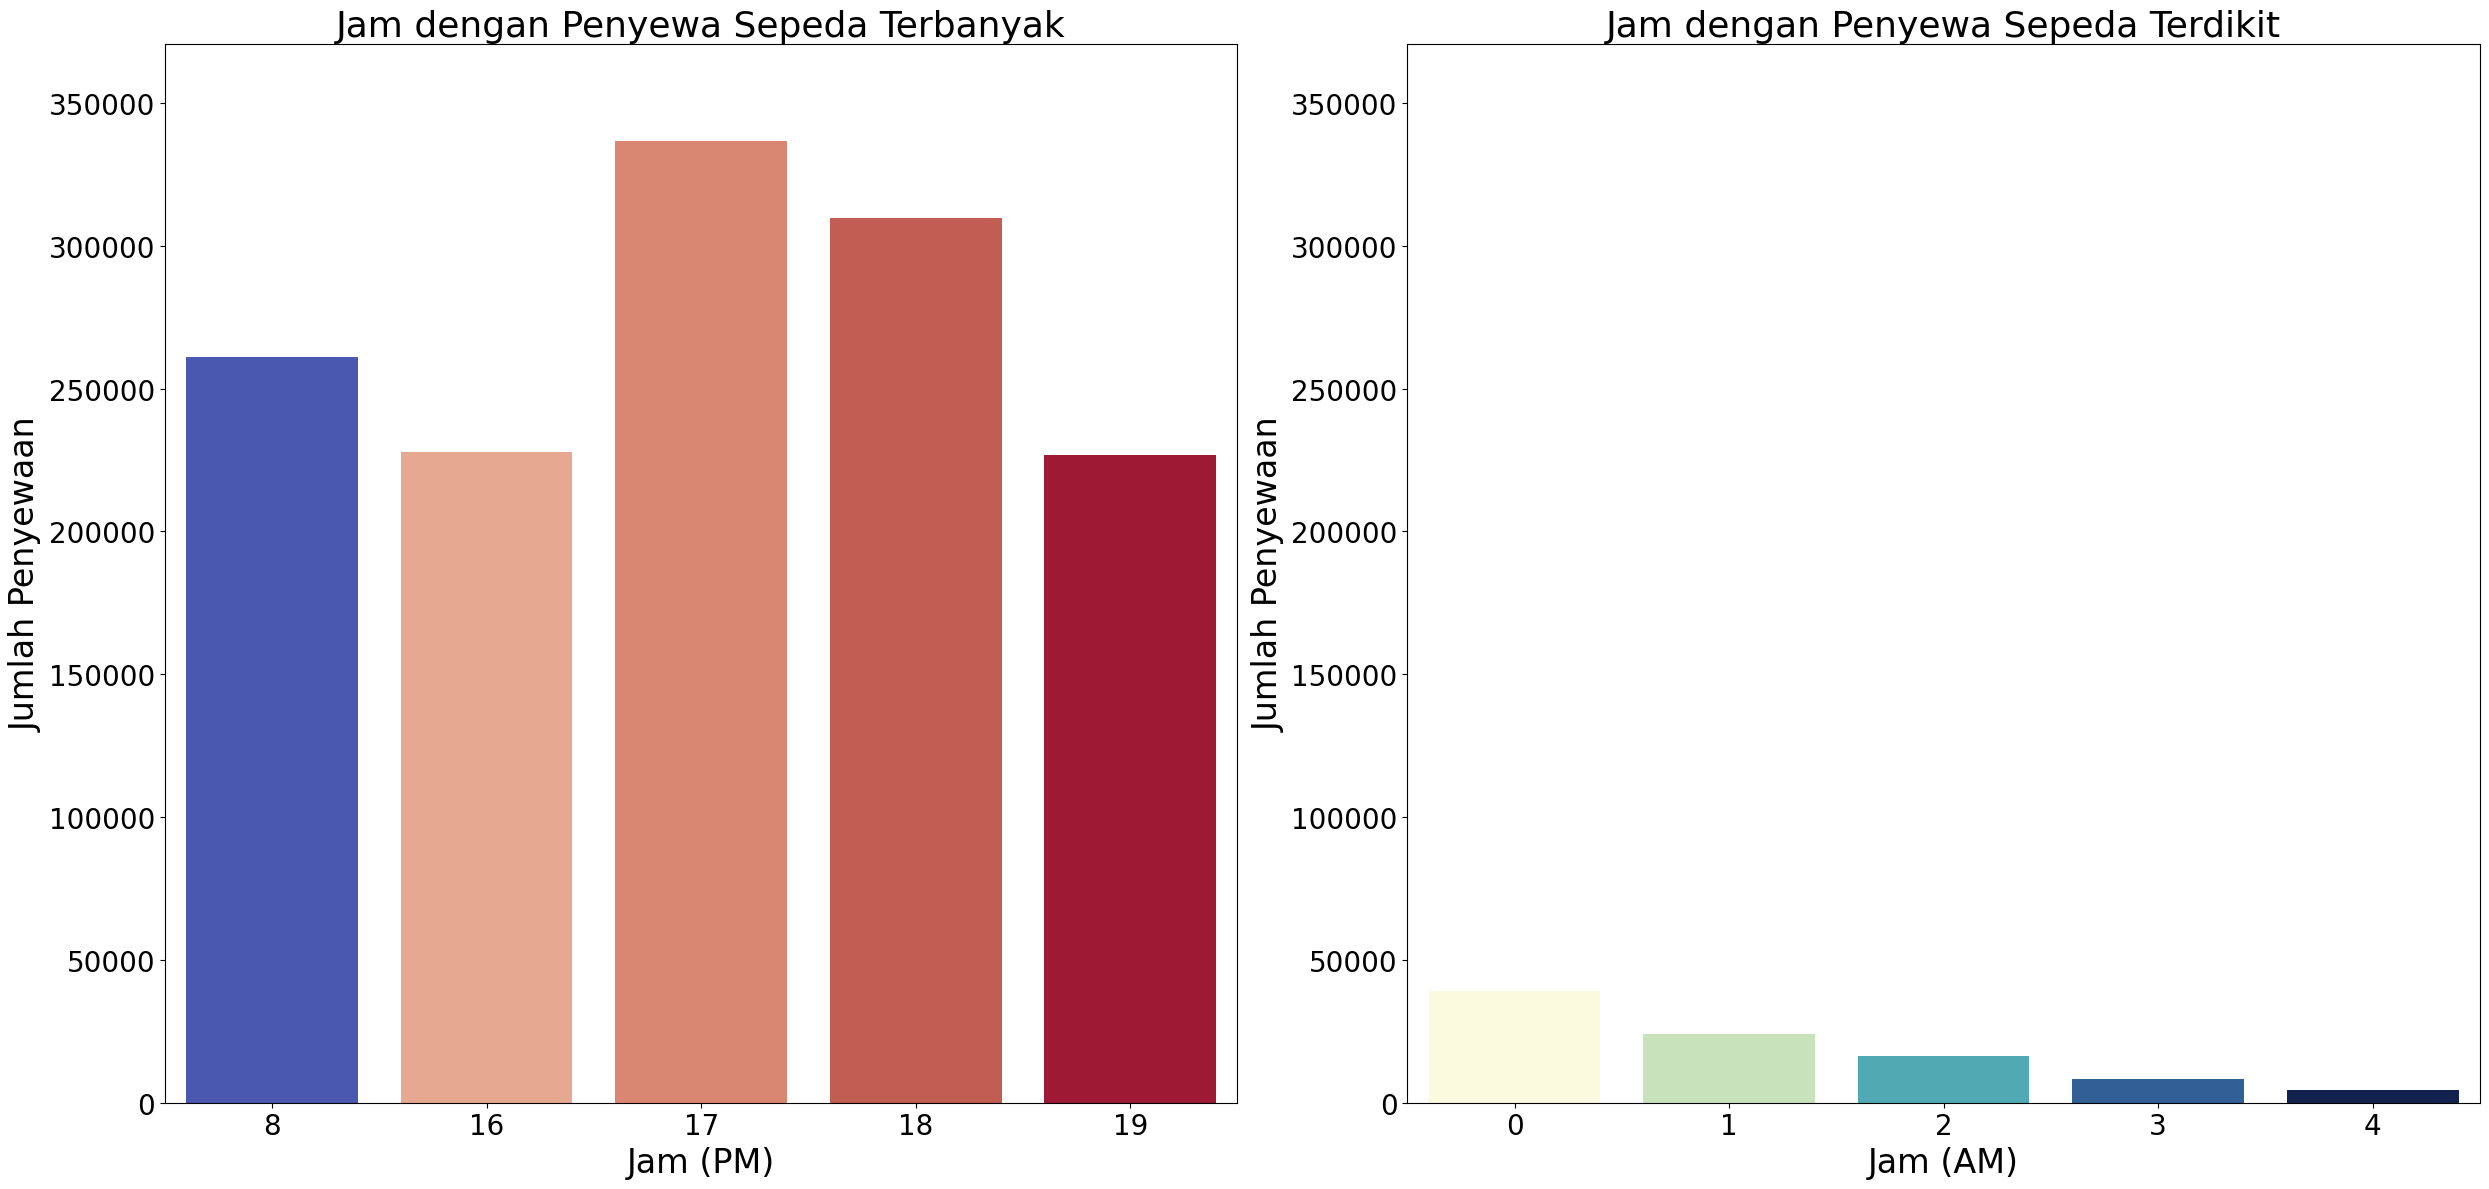

In [67]:
sum_order_items_df = hour.groupby("hour")["total_count"].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))

# Barplot untuk jam dengan penyewa sepeda terbanyak
sns.barplot(
    x="hour",
    y="total_count",
    data=sum_order_items_df.head(5),
    palette="coolwarm",
    hue="hour",  # Menambahkan hue untuk menghilangkan peringatan
    ax=ax[0]
)
ax[0].legend_.remove()  # Menghapus legend karena tidak diperlukan
ax[0].set_xlabel("Jam (PM)", fontsize=24)
ax[0].set_ylabel("Jumlah Penyewaan", fontsize=24)
ax[0].set_title("Jam dengan Penyewa Sepeda Terbanyak", loc="center", fontsize=26)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].set_ylim(0, sum_order_items_df["total_count"].max() * 1.1)  # Memberikan ruang di atas maksimum

# Barplot untuk jam dengan penyewa sepeda terdikit
sns.barplot(
    x="hour",
    y="total_count",
    data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5),
    palette="YlGnBu",
    hue="hour",  # Menambahkan hue untuk menghilangkan peringatan
    ax=ax[1]
)
ax[1].legend_.remove()  # Menghapus legend karena tidak diperlukan
ax[1].set_xlabel("Jam (AM)", fontsize=24)
ax[1].set_ylabel("Jumlah Penyewaan", fontsize=24)
ax[1].set_title("Jam dengan Penyewa Sepeda Terdikit", loc="center", fontsize=26)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].set_ylim(0, sum_order_items_df["total_count"].max() * 1.1)  # Memberikan ruang di atas maksimum

# Menampilkan grafik
plt.tight_layout()
plt.show()

Dari kedua grafik tersebut, dapat disimpulkan bahwa jam 17:00 merupakan waktu dengan jumlah penyewaan sepeda terbanyak, berada di range sekitar 300.000 - 350.000 penyewaan. Sebaliknya, jam 04:00 mencatatkan jumlah penyewaan sepeda yang paling sedikit, yaitu sekitar dibawah 50.000 atau sekitar 4.428 penyewaan.

### Pertanyaan 2: Apakah ada peningkatan atau penurunan yang konsisten dalam jumlah penyewaan sepeda setiap bulan?

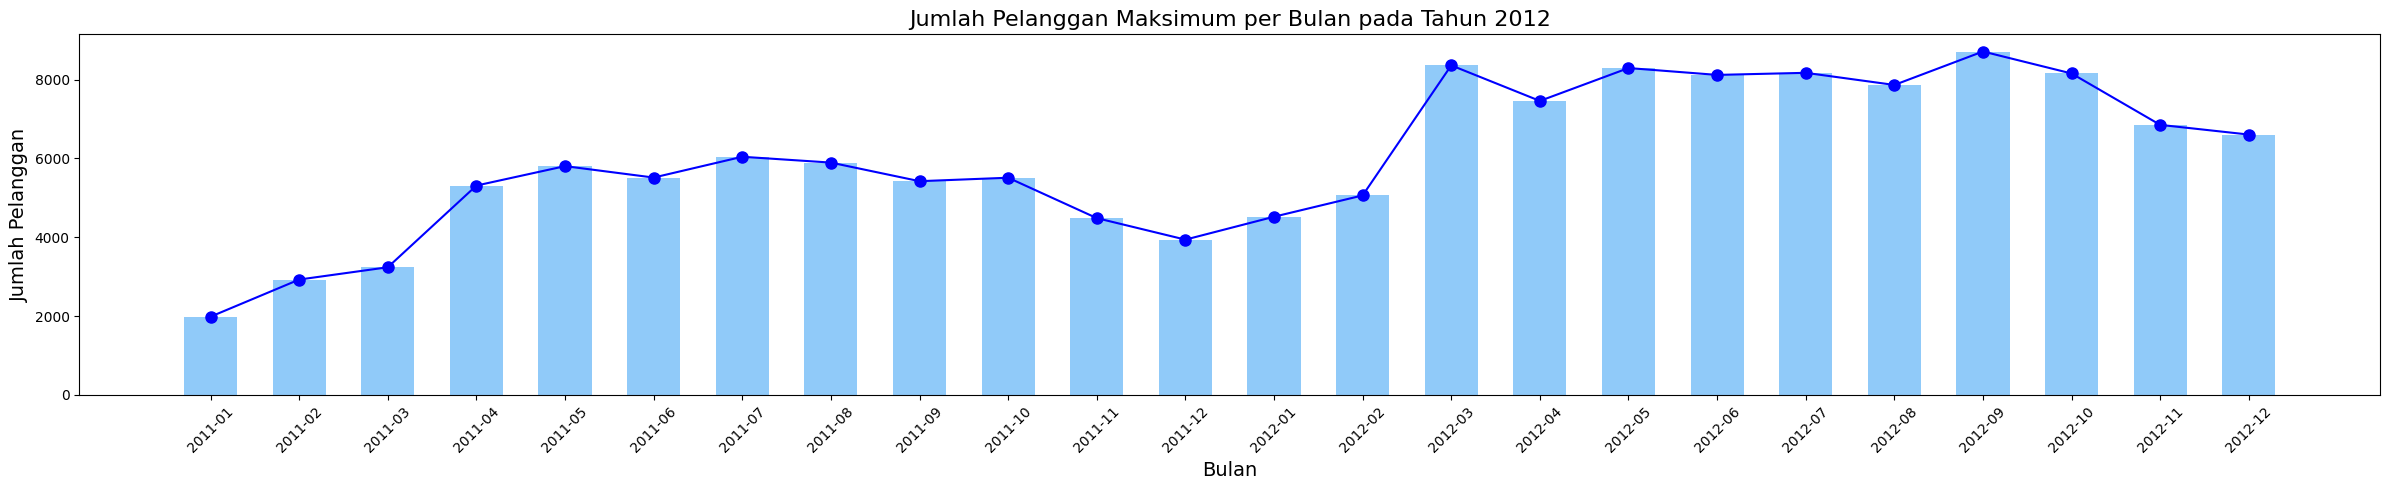

In [68]:
# Mengatur ukuran figure
plt.figure(figsize=(24, 5))

# Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day.groupby(day['dteday'].dt.to_period('M'))['total_count'].max()

plt.bar(monthly_counts.index.astype(str), monthly_counts.values, color="#90CAF9", width=0.6)

plt.plot(monthly_counts.index.astype(str), monthly_counts.values, color="blue", marker="o", markersize=8)

# label sumbu x
plt.xlabel('Bulan', fontsize=14)

# label sumbu y
plt.ylabel('Jumlah Pelanggan', fontsize=14)

plt.title('Jumlah Pelanggan Maksimum per Bulan pada Tahun 2012', fontsize=16)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Terdapat tren umum peningkatan jumlah penyewaan sepeda dari awal hingga pertengahan grafik (sekitar tahun 2011 hingga pertengahan 2012).
- Setelah pertengahan tahun 2012, grafik menunjukkan adanya fluktuasi dengan puncak yang lebih tinggi, tetapi juga beberapa penurunan signifikan di bulan-bulan tertentu.
- Menjelang akhir grafik, tren menunjukkan sedikit penurunan dalam jumlah penyewaan.

### Pertanyaan 3 : Apakah pola musiman (musim panas, musim dingin, dll.) berpengaruh terhadap frekuensi peminjaman sepeda?

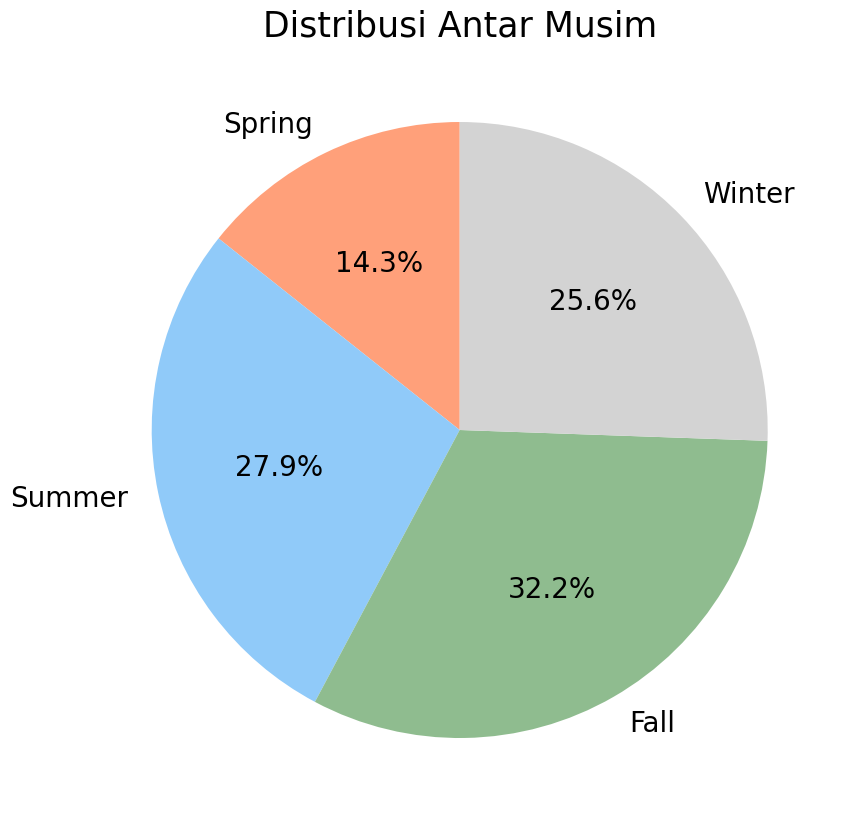

In [69]:
colors = ["#FFA07A", "#90CAF9", "#8FBC8F", "#D3D3D3"]  # Warna unik untuk masing-masing musim

# Hitung total 'total_count' untuk setiap musim
season_counts = day.groupby("season", observed=False)["total_count"].sum()

# Membuat pie chart
fig, ax = plt.subplots(figsize=(10, 10))  # Ukuran subplot

# Plot pie chart
ax.pie(
    season_counts,  # Data jumlah
    labels=season_counts.index,  # Label untuk setiap musim
    autopct='%1.1f%%',  # Format persentase
    colors=colors,  # Warna berdasarkan musim
    startangle=90,  # Sudut awal
    textprops={'fontsize': 20}  # Ukuran font
)

# Menambahkan judul
ax.set_title("Distribusi Antar Musim", fontsize=25)

# Menampilkan plot
plt.show()

Musim dengan jumlah penyewaan terbanyak adalah musim gugur (Fall), dengan total penyewaan mencapai 1.061.129.

## Conclusion

- Conclution pertanyaan 1 : Penyewaan sepeda dengan frekuensi terbanyak terjadi pada pukul 17:00 sekitar 336860 penyewaan , kemungkinan besar karena banyak orang menggunakan sepeda untuk pulang kerja atau aktivitas sore. Waktu penyewaan terendah terjadi pada pukul 04:00 sekitar 4428, ketika aktivitas manusia biasanya sangat minim.Pertimbangkan untuk meningkatkan jumlah sepeda yang tersedia di sore hari, terutama pada rute yang sering dilalui oleh pekerja.
- Conclution pertanyaan 2 : Penyewaan sepeda mengalami peningkatan yang stabil dari 2011 hingga pertengahan 2012, menunjukkan pertumbuhan kebutuhan akan penyewaan sepeda. Namun, setelah itu, pola menjadi lebih fluktuatif, dengan puncak penyewaan yang tinggi tetapi juga beberapa penurunan tajam di bulan tertentu. Menjelang akhir periode, terdapat indikasi penurunan minat penyewaan sepeda.
- Conclution pertanyaan 3 : Musim gugur memiliki tingkat penyewaan sepeda tertinggi, sekitar 32.2% penjualan pertahun terjadi di musim tersebut / sekitar 1061129 penyewaan. Hal tersebut menunjukkan bahwa cuaca sejuk tanpa ekstrem menjadi waktu favorit untuk bersepeda, dapat disimpulkan pola musiman berpengaruh pada tingkat penyewaan sepeda. Selama musim gugur, tingkatkan promosi dan operasional untuk memanfaatkan minat yang tinggi, seperti paket langganan khusus musim gugur.